In [298]:
from keras import datasets
from keras import models
from keras import layers
from keras import losses, activations, optimizers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [299]:
mnist = datasets.mnist.load_data()
x = mnist[0][0]
y = mnist[0][1]
y = to_categorical(y)
x_test, y_test = mnist[1][0], mnist[1][1]

In [300]:
new_x = x.reshape(60000, 28,28, 1).astype("float32")/255

In [338]:
input1 = layers.Input((28,28,1 ))
x = layers.Conv2D(16, (3,3), strides=2, activation="relu", padding="same")(input1)
x = layers.Conv2D(32, (3,3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(16, (3,3), strides=2, activation="relu", padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)


model = models.Model(input1, x)

In [339]:
model.compile('adam',loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [341]:
model.fit(new_x, y, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0258 - acc: 0.9920 - val_loss: 0.0693 - val_acc: 0.9818
Epoch 2/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0548 - val_acc: 0.9853
Epoch 3/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0204 - acc: 0.9934 - val_loss: 0.0593 - val_acc: 0.9847
Epoch 4/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0165 - acc: 0.9944 - val_loss: 0.0749 - val_acc: 0.9817
Epoch 5/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0174 - acc: 0.9940 - val_loss: 0.0642 - val_acc: 0.9850
Epoch 6/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0668 - val_acc: 0.9829
Epoch 7/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0661 - 

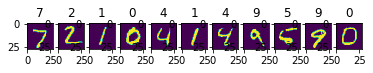

In [344]:
# num = np.argmax(model.predict(x_test.reshape(x_test.shape[0], 28,28,1)), 1)
counter = 0
for i in num:
    plt.subplot(1,11, counter+1)
    plt.title(num[counter])
    plt.imshow(x_test.reshape(x_test.shape[0], 28,28)[counter])
    if counter == 10:
        break
    counter += 1
plt.show()